## Import Data

In [4]:
data_path = "C:\\Users\\colem\\Desktop\\Senior\\BigData\\GE_BigData_Project\\GE_Outcomes_V2\\Data\\Compliance\\GE_Compliance.csv"

import pandas as pd

dataframe = pd.DataFrame(pd.read_csv(data_path))

dataframe


,course_id,Assignments,Students,outcome_1,outcome_2,teacher_#1_name,teacher_#1_email,semester,course,section,college,Compliance,Reason
0,FA2022_ARDE2020_01,0,36.0,HU1,NaN,Jamie Tucker,JTucker@nnu.edu,FA2022,ARDE2020,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
1,FA2022_ARDE3250_01,0,24.0,HU1,NaN,Jamie Tucker,JTucker@nnu.edu,FA2022,ARDE3250,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
2,FA2022_ARDE3340_01,0,16.0,HU1,NaN,R Kinsman,PKinsman@nnu.edu,FA2022,ARDE3340,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
3,FA2022_BIBL1100_01,0,43.0,CF1,NaN,Mary Schmitt,MSchmitt@nnu.edu,FA2022,BIBL1100,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
4,FA2022_BIBL1100_02,0,43.0,CF1,NaN,Grant Miller,GTMiller@nnu.edu,FA2022,BIBL1100,02,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,SP2022_THEO3630_01,0,29.0,CF3,HU3,Christina Smerick,CSmerick@nnu.edu,SP2022,THEO3630,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
287,SP2022_THEO3710_01,0,23.0,CF3,NaN,Diane Leclerc,DKLeclerc@nnu.edu,SP2022,THEO3710,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
288,SP2022_THEO3730_01,0,25.0,CF3,HU3,Joe Gorman,JTGorman@nnu.edu,SP2022,THEO3730,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
289,SP2022_THEO4900_01,12,13.0,HU2,NaN,Diane Leclerc,DKLeclerc@nnu.edu,SP2022,THEO4900,01,College of Theology and Christian Ministry,Nice,Compliant


## Plot Data to look for patterns

<AxesSubplot:title={'center':'Average Number of Students per Course based on College'}, xlabel='college'>

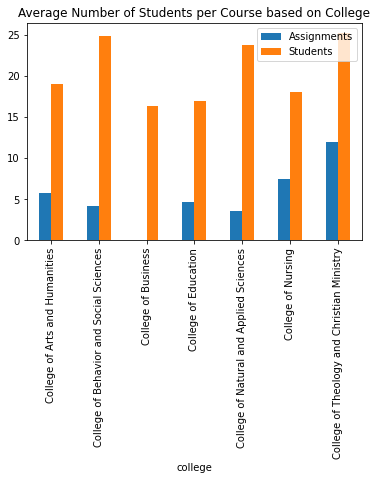

In [6]:
students_table = dataframe.pivot_table(index='college',values=['Students', 'Assignments'])
students_table.plot(kind='bar', title='Average Number of Students per Course based on College')

<AxesSubplot:title={'center':'Average NUmber of Students based on Compliancy in College'}, xlabel='college'>

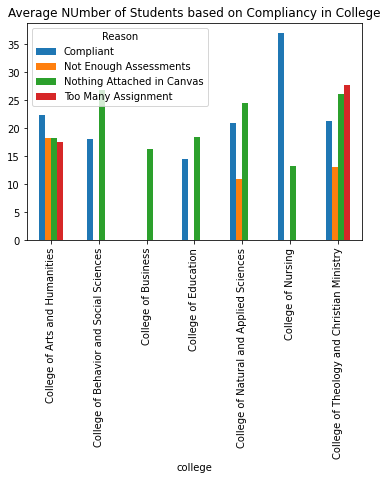

In [29]:
compliance_table = dataframe.pivot_table(index=['college'],columns=['Reason'], values='Students')
compliance_table.plot(kind='bar', title='Average NUmber of Students based on Compliancy in College')

## Use Sci-Kit Learn to Make Predictions

In [28]:
from sklearn.utils import shuffle

## Randomized all of the non-null entries in the table
randomized = shuffle(dataframe.loc[dataframe['outcome_1'].notnull()])
count = randomized['Students'].count()

## Set the number of training data
training_percent = 0.8
training_size = int(count * training_percent)
test_size = int(count * (1-training_percent))

## Randomly select values for training data
train_students = randomized['Students'].head(training_size).values
train_colleges = randomized['college'].head(training_size).values
train_results = randomized['Reason'].head(training_size).values

print(train_students)
print(train_colleges)
print(train_results)



## Randomly select values for training data
test_students = randomized['Students'].tail(test_size).values
test_colleges = randomized['college'].tail(test_size).values
test_results = randomized['Reason'].tail(test_size).values

print(test_students)
print(test_colleges)

[ 9. 23.  3. 31.  6. 13. 24. 24.  9. 34. 18. 29.  8. 22. 15. 24.  9. 13.
 18. 17. 19.  7. 32. 40. 25. 14. 19. 30.  4. 28. 21. 22. 13. 40. 16. 41.
 13. 11. 39. 24.  9.  7. 19.  9.  3. 17.  9.  7. 15. 15. 18.  4. 42. 25.
 26. 10. 54. 45. 32.  3. 46. 33. 21. 16. 35.  8.  3. 19. 15. 24. 33. 15.
 30.  7.  9. 15. 24. 12. 18. 15.  9. 25. 29. 20. 21. 36. 18. 12. 37.  5.
 24. 16. 12. 15. 23. 39. 24. 13. 11. 26. 49. 28. 20. 17. 22. 27. 11.  2.
 11. 15. 24. 11.  6. 14. 23. 59. 24. 13. 27.  9. 22. 12. 43.  4. 20. 11.
 24. 26. 33. 23. 37. 37. 13. 25. 11. 18. 32. 27.  1. 43. 21. 12. 43. 31.
 28. 18. 34. 19. 14. 20.  3. 15. 36. 35. 13.  8.  2. 51. 16. 15. 24. 25.
 14.  6. 41. 34.  9. 10. 10. 57.  7. 39.  7. 18.  7. 16. 41. 21. 11. 23.
 25. 56. 16. 24. 17.  7. 23.  9.  7. 23. 20.  2.  3.  9. 18. 27. 44. 10.
 37. 23. 18.  7. 43. 19. 18. 17. 24. 28. 13. 38.  2. 23. 19. 47. 46. 23.
 29. 11. 22. 17.  6.]
['College of Behavior and Social Sciences'
 'College of Arts and Humanities' 'College of Arts and Huma

In [29]:
## We need to transform colleges training data to numberic data
from sklearn import preprocessing
training_encoder = preprocessing.LabelEncoder()
testing_encoder = preprocessing.LabelEncoder()
college_training_labels = training_encoder.fit_transform(train_colleges)
college_testing_labels = testing_encoder.fit_transform(test_colleges)

training_data = []

for index, label in enumerate(college_training_labels):
    current = [college_training_labels[index], train_students[index]]
    training_data.append(current)


testing_data = []
for index, label in enumerate(college_testing_labels):
    current = [college_testing_labels[index], test_students[index]]
    testing_data.append(current)

print("Training Data")
print(training_data)

print("\n\nTesting Data")
print(testing_data)

Training Data
[[1, 9.0], [0, 23.0], [0, 3.0], [6, 31.0], [6, 6.0], [6, 13.0], [0, 24.0], [4, 24.0], [4, 9.0], [6, 34.0], [0, 18.0], [6, 29.0], [0, 8.0], [5, 22.0], [0, 15.0], [4, 24.0], [1, 9.0], [6, 13.0], [2, 18.0], [0, 17.0], [0, 19.0], [4, 7.0], [6, 32.0], [4, 40.0], [0, 25.0], [4, 14.0], [0, 19.0], [0, 30.0], [0, 4.0], [2, 28.0], [0, 21.0], [4, 22.0], [6, 13.0], [6, 40.0], [0, 16.0], [4, 41.0], [0, 13.0], [4, 11.0], [4, 39.0], [6, 24.0], [0, 9.0], [4, 7.0], [0, 19.0], [0, 9.0], [0, 3.0], [4, 17.0], [6, 9.0], [6, 7.0], [4, 15.0], [0, 15.0], [0, 18.0], [3, 4.0], [6, 42.0], [1, 25.0], [2, 26.0], [2, 10.0], [4, 54.0], [6, 45.0], [6, 32.0], [4, 3.0], [4, 46.0], [0, 33.0], [6, 21.0], [0, 16.0], [0, 35.0], [1, 8.0], [2, 3.0], [0, 19.0], [4, 15.0], [0, 24.0], [6, 33.0], [0, 15.0], [2, 30.0], [3, 7.0], [0, 9.0], [0, 15.0], [0, 24.0], [4, 12.0], [6, 18.0], [0, 15.0], [4, 9.0], [4, 25.0], [4, 29.0], [4, 20.0], [4, 21.0], [4, 36.0], [0, 18.0], [4, 12.0], [5, 37.0], [0, 5.0], [0, 24.0], [3, 16

In [30]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier()
myTree = myTree.fit(training_data, train_results)

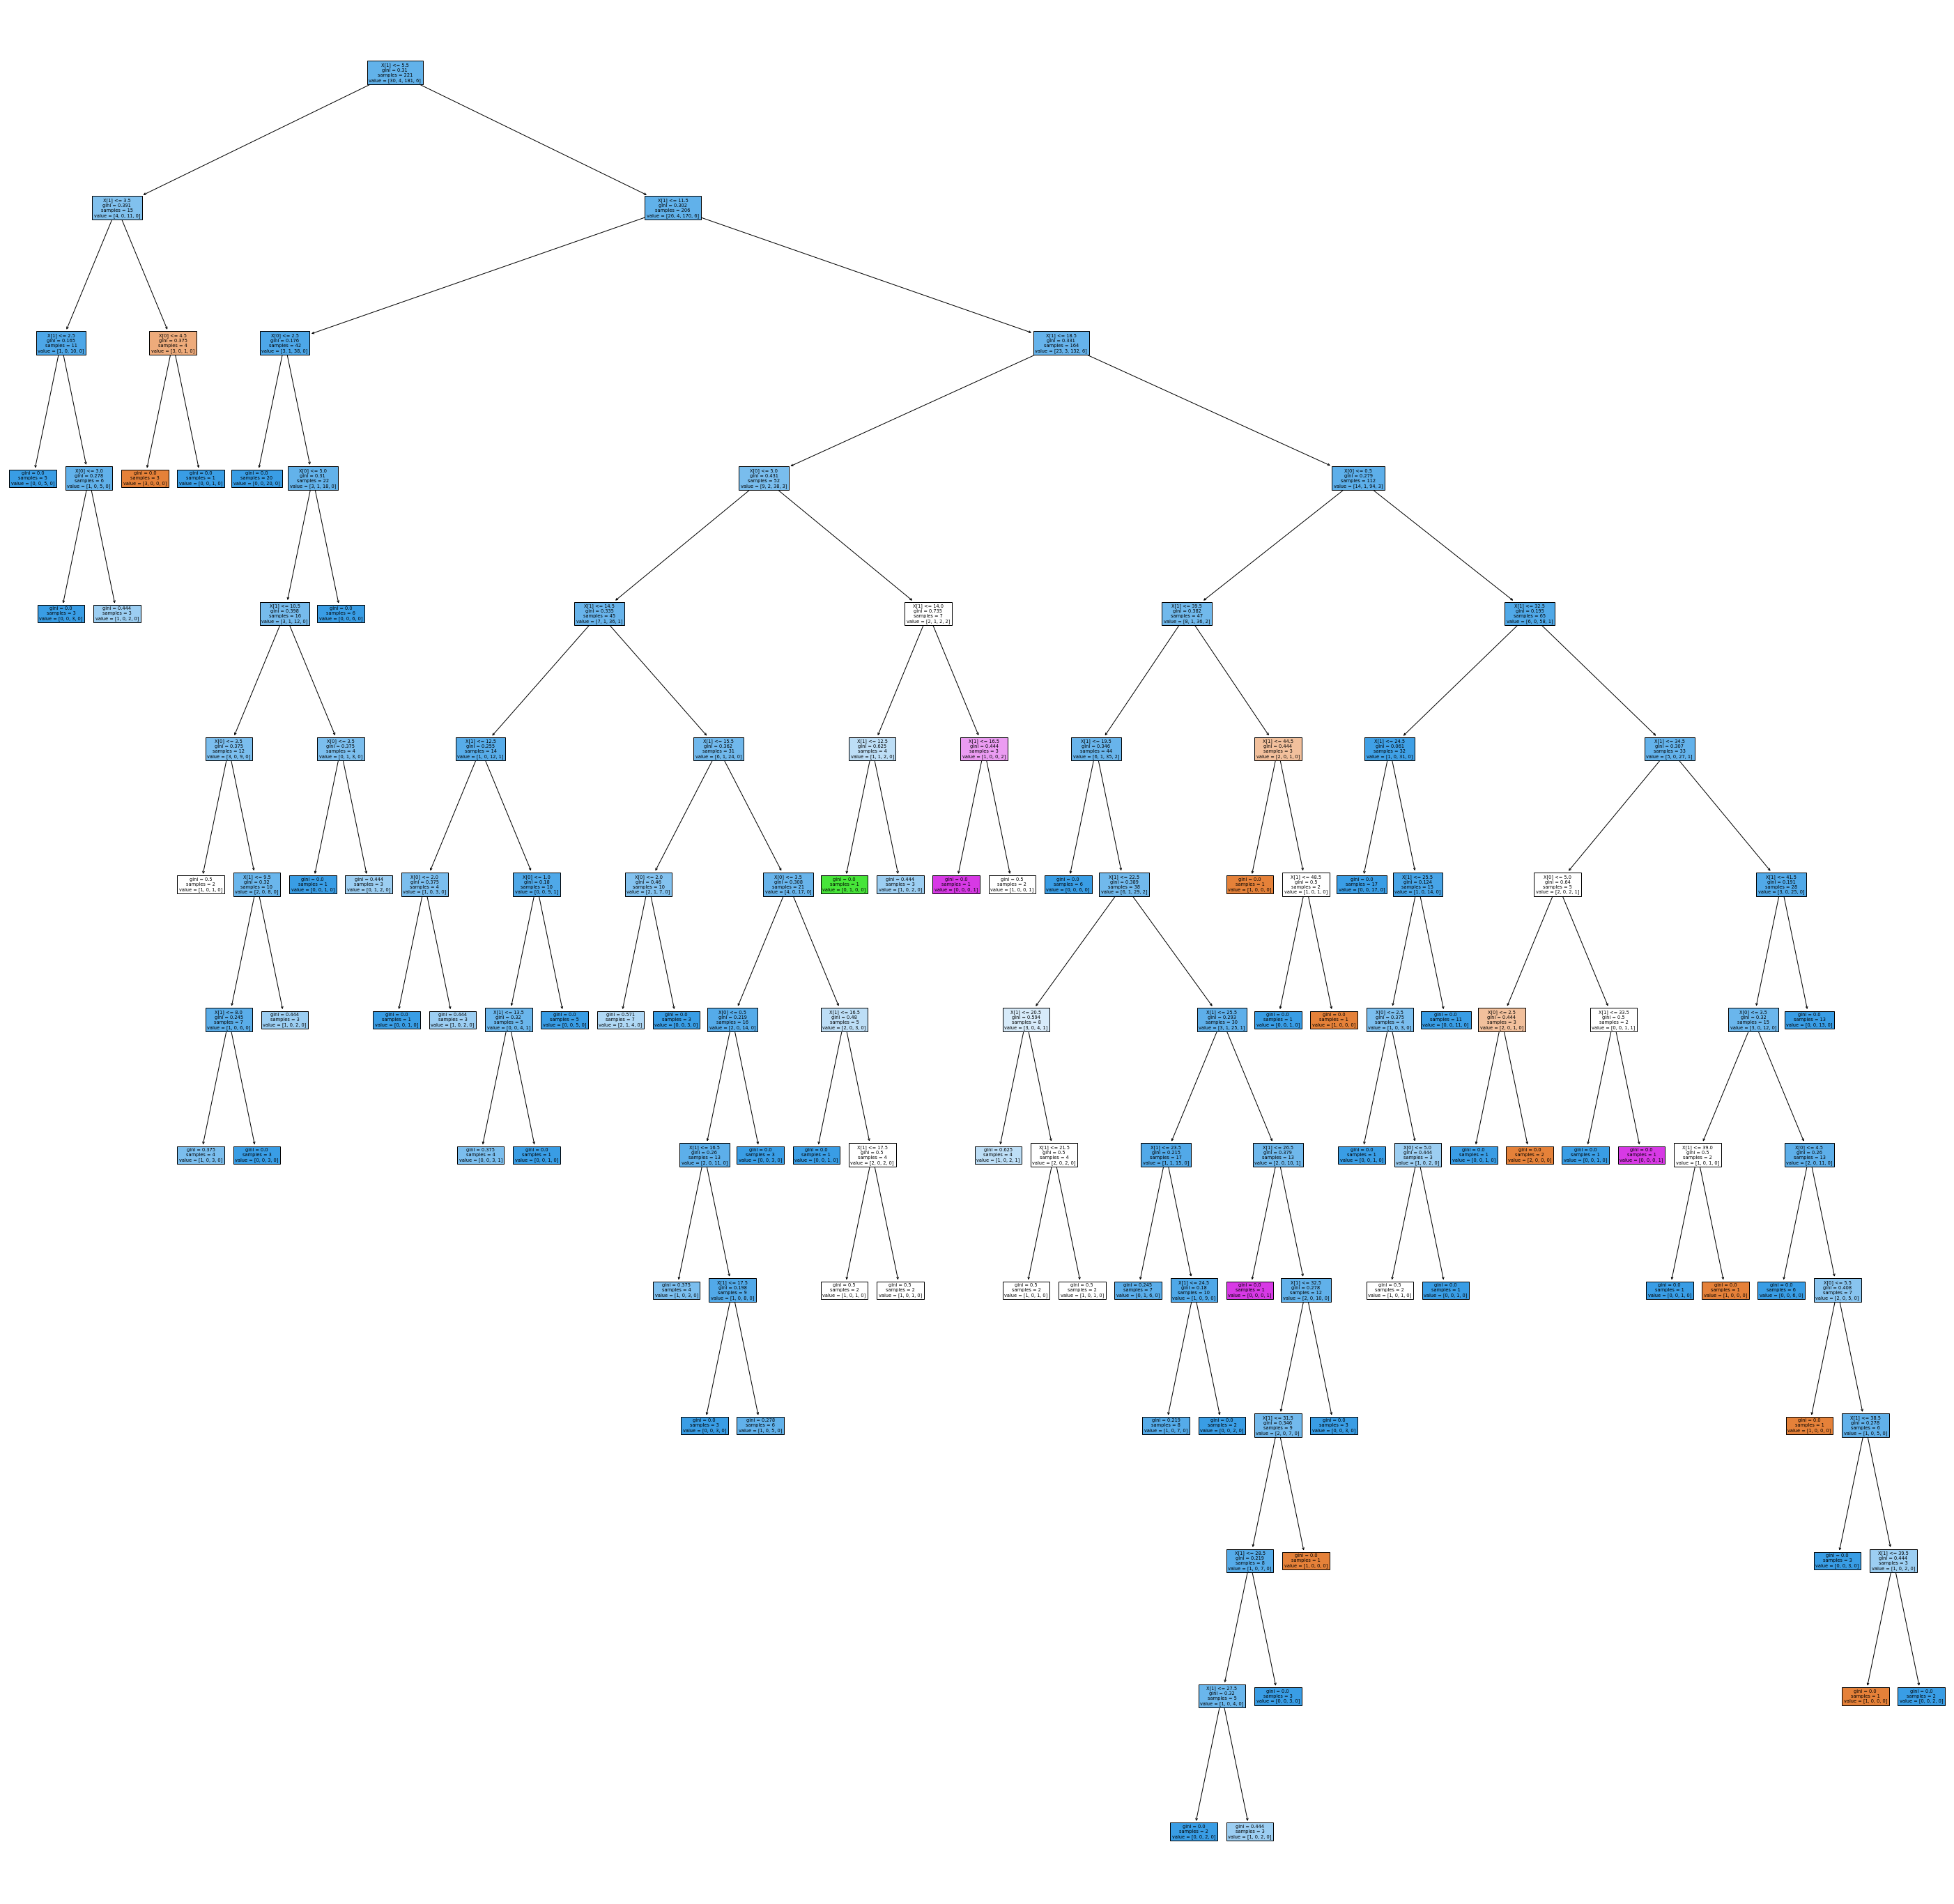

In [59]:
# Visualize the Decision Tree

import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50)) # Resize figure
tree.plot_tree(myTree, filled=True)
plt.show()

In [60]:
correct = 0
total = 0

for index, data in enumerate(testing_data):
    ## Predict each piece of testing data
    current = [testing_data[index]]
    prediction = myTree.predict(current)

    ## Determine what inputs led to the prediction
    current_student_count = test_students[index]
    current_college = test_colleges[index]

    if(prediction == test_results[index]):
        correct+=1

    print('A course in the ' + current_college + ' with ' + str(int(current_student_count)) + ' students is predicted to result in '  + prediction)
    total +=1
    
print('Total Accuracy: ' + str(correct) + ' correct predictions out of ' + str(total) + ' total predictions [' + str(int((correct/total) * 100)) + '%]')

['A course in the College of Natural and Applied Sciences with 34 students is predicted to result in Compliant']
['A course in the College of Arts and Humanities with 50 students is predicted to result in Compliant']
['A course in the College of Theology and Christian Ministry with 26 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Theology and Christian Ministry with 45 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Behavior and Social Sciences with 84 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Natural and Applied Sciences with 16 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Arts and Humanities with 34 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Natural and Applied Sciences with 65 students is predicted to result in Nothing Attached in Canvas']
['A co

## Test your own

In [55]:
user_college = ['College of Natural and Applied Sciences']
user_student = [20]

labeled_college = training_encoder.transform(user_college)

current = [[labeled_college[0], user_student[0]]]
prediction = myTree.predict(current)


print('Your course in the ' + user_college[0] + ' with ' + str(int(user_student[0])) + ' students is predicted to result in '  + prediction)

['Your course in the College of Natural and Applied Sciences with 20 students is predicted to result in Nothing Attached in Canvas']
